## Importación de librerías

In [8]:
import pandas as pd
from summarytools import dfSummary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


## Lectura del archivo con los datos

In [9]:
data = pd.read_csv("stats_survey.csv")
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Timestamp                                                                                          406 non-null    object 
 1   Your Sex?                                                                                          404 non-null    object 
 2   Your Matric (grade 12) Average/ GPA (in %)                                                         399 non-null    float64
 3   What year were you in last year (2023) ?                                                           333 non-null    object 
 4   What faculty does your degree fall under?                                                          399 non-null    object 

(                   Timestamp Your Sex?  \
 0  2024/03/07 5:12:01 pm EET    Female   
 1  2024/03/07 5:12:08 pm EET      Male   
 2  2024/03/07 5:12:25 pm EET      Male   
 3  2024/03/07 5:12:28 pm EET      Male   
 4  2024/03/07 5:13:00 pm EET    Female   
 
    Your Matric (grade 12) Average/ GPA (in %)  \
 0                                        76.0   
 1                                        89.0   
 2                                        76.0   
 3                                        89.0   
 4                                        74.0   
 
   What year were you in last year (2023) ?  \
 0                                 2nd Year   
 1                                 2nd Year   
 2                                 1st Year   
 3                                 2nd Year   
 4                                 2nd Year   
 
   What faculty does your degree fall under?  \
 0                    Arts & Social Sciences   
 1            Economic & Management Sciences   
 2        

## Resumen Mejorado de los datos

In [10]:
data = data.iloc[:,1:]
dfSummary(data).to_latex("dfSummary.tex")

## Generación de la tabla que describe los datos

In [11]:
variables = data.columns
descripciones = [
    "Sexo del estudiante",
    "Rendimiento escolar en porcentaje",
    "Año en el que estaba el estudiante en 2023",
    "Facultad a la que pertenece el grado del estudiante",
    "Promedio académico del año 2023 en porcentaje",
    "Estado de alojamiento del estudiante en 2023",
    "Mesada mensual en 2023",
    "Beca o financiamiento en 2023",
    "Horas adicionales de estudio por semana",
    "Frecuencia de salidas sociales durante la semana",
    "Número de bebidas alcohólicas consumidas en una salida nocturna",
    "Clases perdidas por razones relacionadas con el alcohol",
    "Cantidad de módulos que el estudiante ha reprobado hasta el momento en sus estudios.",
    "¿El estudiante actualmente está en una relación romántica?",
    "Aprobación del consumo de alcohol por parte de los padres",
    "Relación con los padres",
]
tipos = [
    "Cualitativa",
    "Cuantitativa",
    "Cualitativa",
    "Cualitativa",
    "Cuantitativa",
    "Cualitativa",
    "Cualitativa",
    "Cualitativa",
    "Cualitativa",
    "Cualitativa",
    "Cualitativa",
    "Cualitativa",
    "Cualitativa",
    "Cualitativa",
    "Cualitativa",
    "Cualitativa",
]
tipos_de_datos = [
    "Cadena",
    "Decimal",
    "Cadena",
    "Cadena",
    "Decimal",
    "Cadena",
    "Cadena",
    "Cadena",
    "Cadena",
    "Cadena",
    "Cadena",
    "Cadena",
    "Cadena",
    "Cadena",
    "Cadena",
    "Cadena",
]

In [12]:
description_table = pd.DataFrame(
    {
        "Variable": variables,
        "Descripción": descripciones,
        "Tipo": tipos,
        "Tipo de Dato": tipos_de_datos,
    }
)
description_table.to_latex()

'\\begin{tabular}{lllll}\n\\toprule\n & Variable & Descripción & Tipo & Tipo de Dato \\\\\n\\midrule\n0 & Your Sex? & Sexo del estudiante & Cualitativa & Cadena \\\\\n1 & Your Matric (grade 12) Average/ GPA (in %) & Rendimiento escolar en porcentaje & Cuantitativa & Decimal \\\\\n2 & What year were you in last year (2023) ? & Año en el que estaba el estudiante en 2023 & Cualitativa & Cadena \\\\\n3 & What faculty does your degree fall under? & Facultad a la que pertenece el grado del estudiante & Cualitativa & Cadena \\\\\n4 & Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student) & Promedio académico del año 2023 en porcentaje & Cuantitativa & Decimal \\\\\n5 & Your Accommodation Status Last Year (2023) & Estado de alojamiento del estudiante en 2023 & Cualitativa & Cadena \\\\\n6 & Monthly Allowance in 2023 & Mesada mensual en 2023 & Cualitativa & Cadena \\\\\n7 & Were you on scholarship/bursary in 2023? & Beca o financiamiento en 2023 & Cualitativa & Caden

In [13]:
# Eliminar filas incompletas de la columna objetivo y con el criterio de los estudiantes universitarios
data = data.dropna(
    subset=[
        "What year were you in last year (2023) ?",
        "Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)",
    ]
)

# Codificación de variables categóricas
categorical_columns = [
    "Your Sex?",
    "What year were you in last year (2023) ?",
    "What faculty does your degree fall under?",
    "Your Accommodation Status Last Year (2023)",
    "Monthly Allowance in 2023",
    "Were you on scholarship/bursary in 2023?",
    "Additional amount of studying (in hrs) per week",
    "How often do you go out partying/socialising during the week? ",
    "On a night out, how many alcoholic drinks do you consume?",
    "How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",
    "How many modules have you failed thus far into your studies?",
    "Are you currently in a romantic relationship?",
    "Do your parents approve alcohol consumption?",
    "How strong is your relationship with your parent/s?",
]
# Aplicamos one-hot encoding para estas variables
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# División de los datos
X = data_encoded.drop(columns=["Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)"])
# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)
y = data_encoded["Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarización/Normalización
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mostrar resultados preliminares
X_train_scaled[:5], y_train[:5]

# Crear el modelo de regresión logística
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 2.7876661113555827e+24
R^2 Score: -4.0059171578264764e+22


Mean Squared Error (MSE): 64.11982852834817
R-squared (R2): 0.1636592998795351


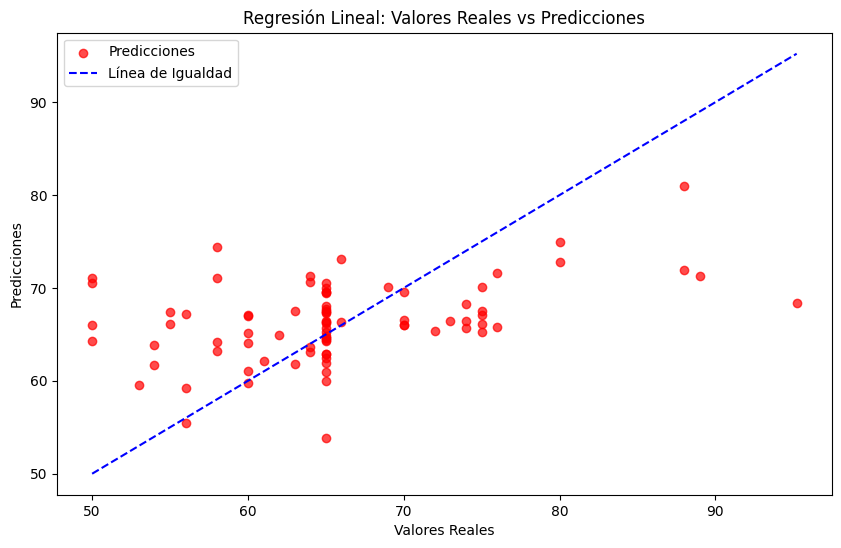

In [14]:


df = pd.read_csv('stats_survey.csv')

# Paso 1: Limpieza y Preprocesamiento de los Datos

# 1.1 Manejo de Valores Nulos
# Imputar valores faltantes en columnas numéricas con la mediana
numeric_cols = df.select_dtypes(include=['float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Imputar valores faltantes en columnas categóricas con la moda
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# 1.2 Codificación de Variables Categóricas
# One-Hot Encoding para variables categóricas nominales
df = pd.get_dummies(df, drop_first=True)

# 1.3 Separación de Datos
# Definir X y y
X = df.drop('Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)', axis=1)
y = df['Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)']

# Normalización de las características
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Paso 2: Implementación del Modelo de Regresión Lineal

# 2.1 División del Conjunto de Datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2.2 Entrenamiento del Modelo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# 2.3 Evaluación del Modelo
y_pred = regressor.predict(X_test)

# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Opcional: Visualización de los resultados
plt.figure(figsize=(10, 6))

# Trazar los puntos para valores reales
plt.scatter(y_test, y_pred, color='red', label='Predicciones', alpha=0.7)

# Trazar la línea de igualdad (valores reales = predicciones)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', label='Línea de Igualdad')

plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal: Valores Reales vs Predicciones')
plt.legend()
plt.show()